In [12]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Expressivity of QKN vs Classic NN

## Mapping of Randomly Initialized Models

### QKN

In [13]:
x = np.linspace(-1, 1, 30)
x = generate_meshgrid([x,x])

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")

In [14]:
np.random.seed(44)
backend = Aer.get_backend('qasm_simulator')

qkn1 = sequential_qnn(n_qubits = [2],
                         dim = [2, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 10000)

qkn2 = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 10000)

qkn3 = sequential_qnn(n_qubits = [2, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder = Encoder(),
                         sampler = Parity(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         backend = backend,
                         shots = 10000)

qkn4 = sequential_qnn(n_qubits = [2, 4, 4, 4],
                         dim = [2, 4, 4, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 10000)

In [15]:
y_pred1 = qkn1.predict(x_qnn).reshape(30,30)
y_pred2 = qkn2.predict(x_qnn).reshape(30,30)
y_pred3 = qkn3.predict(x_qnn).reshape(30,30)
y_pred4 = qkn4.predict(x_qnn).reshape(30,30)

KeyboardInterrupt: 

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 10))

im = ax1.imshow(y_pred1, vmin=0, vmax=1)
ax1.axis("off")

ax2.imshow(y_pred2, vmin=0, vmax=1)
ax2.axis("off")

ax3.imshow(y_pred3, vmin=0, vmax=1)
ax3.axis("off")

ax4.imshow(y_pred4, vmin=0, vmax=1)
ax4.axis("off")

cbar_ax = fig.add_axes([0.11, 0.35, 0.8, 0.03])

plt.colorbar(im, orientation="horizontal", cax=cbar_ax)

plt.show()
fig.savefig(image_path("QKN_random.pdf"), bbox_inches='tight')

### DNN

In [6]:
np.random.seed(42)

dnn1 = sequential_dnn(dim = [2, 1])
dnn2 = sequential_dnn(dim = [2, 6, 1])
dnn3 = sequential_dnn(dim = [2, 6, 6, 1])
dnn4 = sequential_dnn(dim = [2, 6, 6, 6, 1])

In [7]:
y_pred5 = dnn1.predict(x_dnn).reshape(30,30)
y_pred6 = dnn2.predict(x_dnn).reshape(30,30)
y_pred7 = dnn3.predict(x_dnn).reshape(30,30)
y_pred8 = dnn4.predict(x_dnn).reshape(30,30)

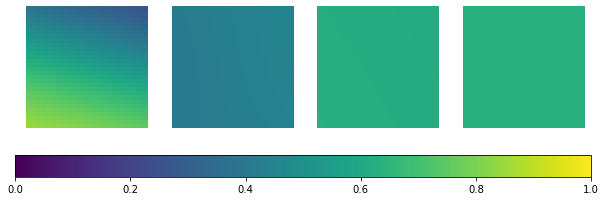

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 10))

im = ax1.imshow(y_pred5, vmin=0, vmax=1)
ax1.axis("off")

ax2.imshow(y_pred6, vmin=0, vmax=1)
ax2.axis("off")

ax3.imshow(y_pred7, vmin=0, vmax=1)
ax3.axis("off")

ax4.imshow(y_pred8, vmin=0, vmax=1)
ax4.axis("off")

cbar_ax = fig.add_axes([0.11, 0.35, 0.8, 0.03])

plt.colorbar(im, orientation="horizontal", cax=cbar_ax)

plt.show()
fig.savefig(image_path("DNN_random.pdf"), bbox_inches='tight')

## Single Circuit

In [ ]:
x_sc = np.hstack([x[:,0], x[:,1], x[:,0]*x[:,1]]) 

In [9]:
np.random.seed(44)
backend = Aer.get_backend('qasm_simulator')

sc1 = sequential_qnn(n_qubits = [4],
                     dim = [2, 1],
                     encoder = Encoder(),
                     ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                     sampler = Parity(),
                     backend = backend,
                     shots = 10000)

sc2 = sequential_qnn(n_qubits = [4],
                     dim = [2, 1],
                     encoder = Encoder(),
                     ansatz = Ansatz(blocks=["entangle", "ry"], reps=4),
                     sampler = Parity(),
                     backend = backend,
                     shots = 10000)

sc3 = sequential_qnn(n_qubits = [4],
                     dim = [2, 1],
                     encoder = Encoder(),
                     ansatz = Ansatz(blocks=["entangle", "ry"], reps=6),
                     sampler = Parity(),
                     backend = backend,
                     shots = 10000)

sc4 = sequential_qnn(n_qubits = [4],
                     dim = [2, 1],
                     encoder = Encoder(),
                     ansatz = Ansatz(blocks=["entangle", "ry"], reps=8),
                     sampler = Parity(),
                     backend = backend,
                     shots = 10000)

In [10]:
y_pred9 = sc1.predict(x_qnn).reshape(30,30)
y_pred10 = sc2.predict(x_qnn).reshape(30,30)
y_pred11 = sc3.predict(x_qnn).reshape(30,30)
y_pred12 = sc4.predict(x_qnn).reshape(30,30)

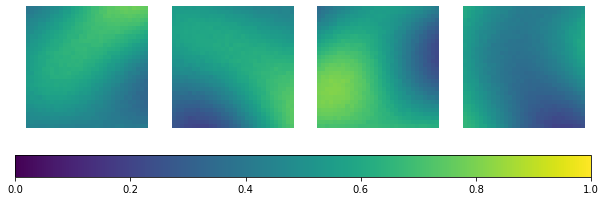

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 10))

im = ax1.imshow(y_pred9, vmin=0, vmax=1)
ax1.axis("off")

ax2.imshow(y_pred10, vmin=0, vmax=1)
ax2.axis("off")

ax3.imshow(y_pred11, vmin=0, vmax=1)
ax3.axis("off")

ax4.imshow(y_pred12, vmin=0, vmax=1)
ax4.axis("off")

cbar_ax = fig.add_axes([0.11, 0.35, 0.8, 0.03])

plt.colorbar(im, orientation="horizontal", cax=cbar_ax)

plt.show()
fig.savefig(image_path("Single_circuit_random.pdf"), bbox_inches='tight')

## Trajectory Length

In [ ]:
theta = np.linspace(0, 2*np.pi, 1000).reshape(-1,1)
x = np.pi*(np.cos(theta) + 1)/2
y = np.pi*(np.sin(theta) + 1)/2
x = np.hstack([x, y])
print(trajectory_length(x))

In [ ]:
plt.plot(x[:,0], x[:,1])
plt.show()

## Quantum Neural Network

### Increasing width

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 3, 3, 3, 3, 3, 3, 3, 3],
                         dim = [2, 3, 3, 3, 3, 3, 3, 3, 3, 1],
                         reps = 1,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_3_reps_1_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 4, 4, 4, 4, 4, 4, 4, 4],
                         dim = [2, 4, 4, 4, 4, 4, 4, 4, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_4_reps_1_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 5, 5, 5, 5, 5, 5, 5, 5],
                         dim = [2, 5, 5, 5, 5, 5, 5, 5, 5, 1],
                         reps = 1,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_5_reps_1_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 6, 6, 6, 6, 6, 6, 6, 6],
                         dim = [2, 6, 6, 6, 6, 6, 6, 6, 6, 1],
                         reps = 1,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_6_reps_1_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 7, 7, 7, 7, 7, 7, 7, 7],
                         dim = [2, 7, 7, 7, 7, 7, 7, 7, 7, 1],
                         reps = 1,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_7_reps_1_shots_1mill"))

### Increasing reps

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 5, 5, 5, 5, 5, 5, 5, 5],
                         dim = [2, 5, 5, 5, 5, 5, 5, 5, 5, 1],
                         reps = 2,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_4_reps_2_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 5, 5, 5, 5, 5, 5, 5, 5],
                         dim = [2, 5, 5, 5, 5, 5, 5, 5, 5, 1],
                         reps = 3,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_4_reps_3_shots_1mill"))

In [ ]:
np.random.seed(42)

network = sequential_qnn(q_bits = [2, 5, 5, 5, 5, 5, 5, 5, 5],
                         dim = [2, 5, 5, 5, 5, 5, 5, 5, 5, 1],
                         reps = 4,
                         backend=backend,
                         shots=1000000)

network.predict(x, verbose=True)
saver(network, data_path("network_expressivity_width_4_reps_4_shots_1mill"))

## Classical Neural Network